In [1]:
%matplotlib notebook

In [2]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# retrieve data
pathFile = "../Resources/cost_of_living_2020.csv"
df = pd.read_csv(pathFile)
df

,State,costIndex,costRank,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,Mississippi,86.1,1,91.6,70.1,89.1,89.2,91.4
1,Arkansas,86.9,2,92.0,73.9,91.8,83.6,85.6
2,Oklahoma,87.0,3,95.4,71.9,94.1,89.5,93.2
3,Missouri,87.1,4,96.6,70.6,99.6,87.3,95.7
4,New Mexico,87.5,5,100.9,77.7,87.9,91.6,100.1
5,Tennessee,88.7,6,93.3,80.2,93.4,89.7,88.5
6,Michigan,88.9,7,89.3,75.2,97.3,97.4,93.0
7,Kansas,89.0,8,91.9,73.8,103.0,92.3,98.9
8,Georgia,89.2,9,96.9,73.8,92.4,97.6,98.5
9,Alabama,89.3,11,97.4,71.5,103.3,88.6,90.8


In [4]:
# isolate columns
dcMetro = ["Washington DC", "Virginia" ]

# grab rows
calcDC = df[df["State"].isin(dcMetro)]
calcDC = calcDC[["State", "costIndex"]]
print(calcDC)

# calculate mean of rows
colDC = calcDC.mean()
colDC

            State  costIndex
29       Virginia      100.7
49  Washington DC      158.4


costIndex    129.55
dtype: float64

In [5]:
# grab state rows
states=["California", "New York", "Massachusetts", "Washington","Pennsylvania", "Illinois", "Texas", "Georgia"]
states_df = df[df["State"].isin(states)]

# isolate columns needed
state_df = states_df[["State", "costIndex"]]
state_df

,State,costIndex
8,Georgia,89.2
17,Texas,91.5
20,Illinois,94.5
31,Pennsylvania,101.7
37,Washington,110.7
45,Massachusetts,131.6
47,New York,139.1
48,California,151.7


In [6]:
# add new DC cost Index
dcMetro_df = pd.DataFrame({"State":"Washington DC",
                           "costIndex": colDC})
dcMetro_df = dcMetro_df.set_index(["State"])
dcMetro_df

# merge dfs
merge_df = pd.merge(state_df, dcMetro_df, on="State", how="outer")
merge_df

# fill in all nan with 0
merge_df = merge_df.fillna(0)

# merge columns together
merge_df["Cost Index"] = merge_df["costIndex_x"] + merge_df["costIndex_y"]

# grab columns and sort
statesBar = merge_df[["State", "Cost Index"]]
statesBar = statesBar.sort_values("Cost Index", ascending=False)
statesBar

,State,Cost Index
7,California,151.70
6,New York,139.10
5,Massachusetts,131.60
8,Washington DC,129.55
4,Washington,110.70
3,Pennsylvania,101.70
2,Illinois,94.50
1,Texas,91.50
0,Georgia,89.20


<IPython.core.display.Javascript object>


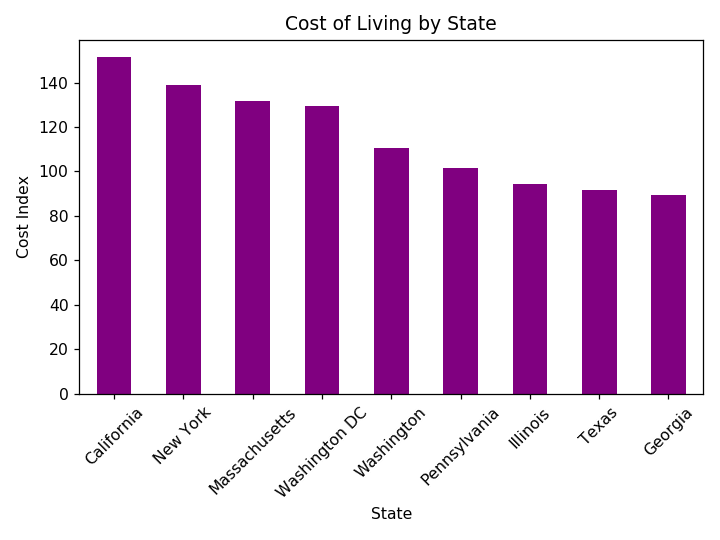

In [7]:
# bar plot
ax = statesBar.plot(kind="bar", x="State", rot=45, title="Cost of Living by State", legend=False, color="purple")
ax.set(ylabel="Cost Index")
plt.tight_layout()

# export png
plt.savefig("../Output/Cost_of_Living_by_State.png")

In [8]:
# add additional row for second california city
statesBar.loc[9] = ["California",151.70]  

# sort
statesBar = statesBar.sort_values("Cost Index", ascending=False)
statesBar

,State,Cost Index
7,California,151.70
9,California,151.70
6,New York,139.10
5,Massachusetts,131.60
8,Washington DC,129.55
4,Washington,110.70
3,Pennsylvania,101.70
2,Illinois,94.50
1,Texas,91.50
0,Georgia,89.20


In [9]:
# city list for naming to be consistent
cities=["San Francisco", "Los Angeles", "NYC", "Boston","Washington DC", "Seattle","Philadelphia","Chicago","Houston","Atlanta"]

In [10]:
# condition for ranking results each city by cost index
rankCOL = []
costIndexList=statesBar['Cost Index']

for x in costIndexList:  
    if x >= 150 < 159: rankCOL.append(8)
    elif x >= 140 < 149 : rankCOL.append(7)
    elif x >= 130 < 139: rankCOL.append(6)
    elif x >= 120 < 129: rankCOL.append(5)
    elif x >= 110 < 119: rankCOL.append(4)
    elif x >= 100 < 109: rankCOL.append(3)
    elif x >= 90 < 99: rankCOL.append(2)
    else: rankCOL.append(1)    
rankCOL

[8, 8, 6, 6, 5, 4, 3, 2, 2, 1]

In [11]:
# grab columns for export
rankCOL_df = pd.DataFrame({"Cities": cities, "Rank COL": rankCOL})
rankCOL_df

,Cities,Rank COL
0,San Francisco,8
1,Los Angeles,8
2,NYC,6
3,Boston,6
4,Washington DC,5
5,Seattle,4
6,Philadelphia,3
7,Chicago,2
8,Houston,2
9,Atlanta,1


In [12]:
# export results to csv
outFile = "../Output/rankCOL.csv"
rankCOL_df.to_csv(outFile)